# Clasificacion con sklearn

https://scikit-learn.org

In [2]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

librerias para graficar 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns    

#### statmodels y sklearn contienen conjuntos de datos para explorar el uso de los modelos.

Es preciso recordar que la librería statsmodels contiene varios métodos para regresión dicreta, por ejemplo:

regresión logística: que se caracteriza como un Modelo Lineal Generalizado que usa la transformación logística como la función de enlace (función link) y se puede invocar el método " sm.GLM "  o  " smf.glm ".


regresión probit: que usa la función de distribución acumulada de la densidad de probabilidad normal para transformar el predictor lineal al intervalo [0, 1] 

regresión logística multinomial: " MNLogit " para el caso en el que hayan más de dos valores de la variable categórica

En este caso que estamos revisando la librería "sklearn" se tomarán como ejemplos guía los dataset que tiene disponible la librería. En particular los datos de clasificación de especies de flores donde la varibla respuesta Y tiene tres categorías

https://en.wikipedia.org/wiki/Iris_flower_data_set

Pero entonces cuál es mejor ? stats models vs sklearn

Quora 

Stack Exchange

Los estadísticos afirman que las personas de machine learning no entienden las matemáticas que hacen que su modelo funcionara, ¡mientras que las personas de ML dicen que no se puede discutir con los resultados!

TO BE CONTINUE . . .

En realidad, los campos tienen cada vez más en común, y una buena competencia para las estadísticas es crucial para hacer un buen trabajo de aprendizaje automático, pero las dos herramientas reflejan en cierta medida esta división.

#### descripcón de los datos

In [34]:
iris = datasets.load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

La variable dependiente "Y" se llama con la instruccion target_names

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# El nombre de las variables caracteristicas se invocan con el comando feature_names 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### algunos atributos del dataset 

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target.shape

(150,)

#### Entrenamiento y testeo 

En este análisis se dividen los datos en 70% para datos de entrenamiento y 30% para datos de testeo y validación

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [11]:
classifier = linear_model.LogisticRegression()

In [12]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Cuando el clasificador ya se ha entrenado, se puede comenzar a usar inmediatamente para predecir la clase de las nuevas observaciones utilizando el método: " predict " .

In [13]:
y_test_pred = classifier.predict(X_test)

El módulo sklearn.metrics contiene para ayudar en el análisis del rendimiento y la precisión de los clasificadores.

$$
recall = \frac{negativos falso}{positivos}
$$

In [14]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.88      0.90        16
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



La matriz de confusión es otra manera de presentar métricas útiles de los resultados de manera compacta. La diagonal corresponde al número de muestras que se clasifican correctamente para cada valor de la variable de categoría. En general cada elemento $C_{ij}$ de la matriz de confusión $C$ es el número de muestras de la categoría $i$ que se clasificaron en la categoría $j$. 

In [15]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 15]])

En esta muestra de prueba, se tienen $13$ elementos en la primera y segunda clase y $19$ elementos de la tercera clase, como se puede ver contando valores únicos en la matriz y_test:

In [16]:
np.bincount(y_test)

array([13, 16, 16])

#### Usando diferentes algoritmos de clasificación

###### árboldes de decisión

In [29]:
classifier = tree.DecisionTreeClassifier()

In [30]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 18]])

La matriz de confusión resultante con el clasificador de árbol de decisión contiene una clasificación errónea adicional en el conjunto de datos de prueba.

###### k-NN kVecinos más cercanos

In [38]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [39]:
clasificador = neighbors.KNeighborsClassifier()

In [40]:
clasificador.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
y_test_pred = clasificador.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]])

In [42]:
np.bincount(y_test)

array([17, 15, 13])

###### Clasificador Random Forest

In [43]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [45]:
clasificar = ensemble.RandomForestClassifier()

In [46]:
clasificar.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_test_pred = clasificar.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 15]])

In [48]:
np.bincount(y_test)

array([13, 17, 15])

Si se quiere evaluar la precisión con respecto a el tamaño del conjunto de entrenamiento se construye un vector (objeto array de numpy) que recorra varios porcentajes, por ejemplo desde 10% hasta 90%.

In [52]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [53]:
# se crea una lista de clasificadores que se quieran evaluar
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier]

In [54]:
# se crea un array para almacenar la diagonal de la matriz de confusión de cada clasificador
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

Y se recorre con un loop por cada radio de conjunto de entrenamiento y para cada clasificador, se entrena el calsificador, se predicen los valores de los datos de prueba, se calcula la matriz de confusión y se guarda la diagonal.

In [65]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,train_size=train_size)
    for m, Classifier in enumerate(classifiers):
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_p = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test,y_test_p).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

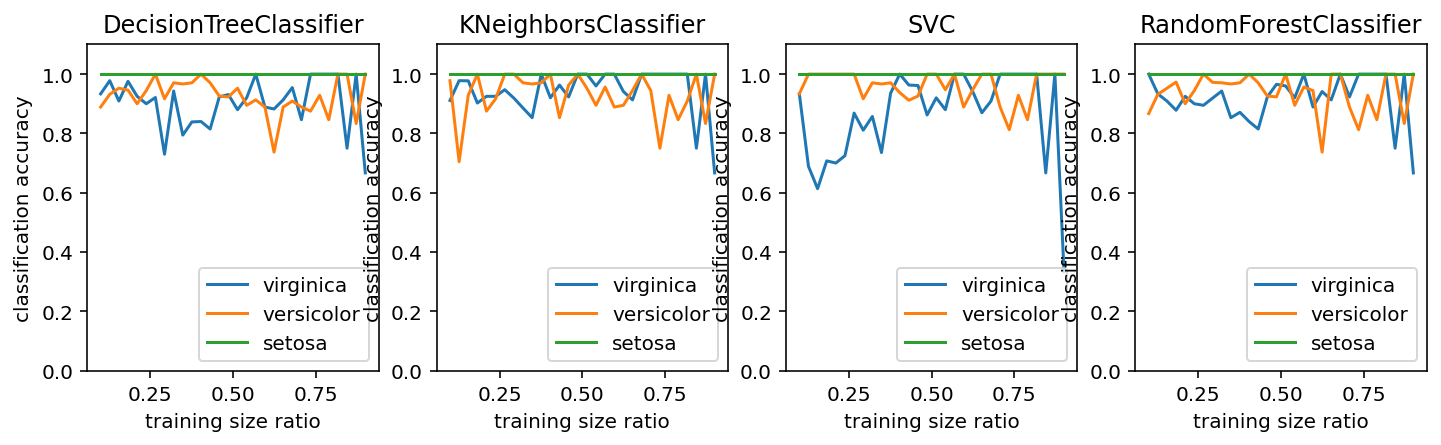

In [66]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))
for m, Classifier in enumerate(classifiers):
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

In [0]:
###### k-NN kVecinos más cercanos

In [0]:
support vector machiine con los datos del diplomado curvos

graficas del libto de hasty

https://tarwi.lamolina.edu.pe/~clopez/Tecnicas/Remuestreo.pdf 

https://github.com/jose03solano/niveles_math
    

http://www3.dsi.uminho.pt/pcortez/fires.pdf

https://archive.ics.uci.edu/ml/datasets/Forest+Fires

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

https://archive.ics.uci.edu/ml/datasets.php